In [11]:
import face_recognition
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

I found 2 face(s) in this photograph.
A face is located at pixel location Top: 257, Left: 544, Bottom: 308, Right: 596


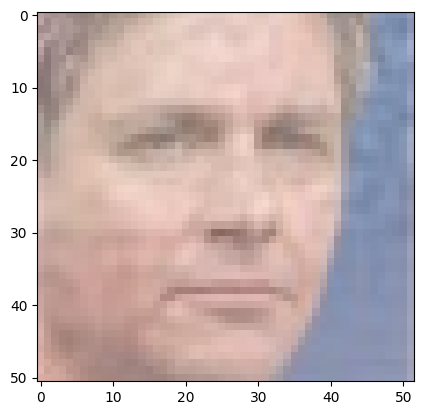

A face is located at pixel location Top: 223, Left: 115, Bottom: 331, Right: 223


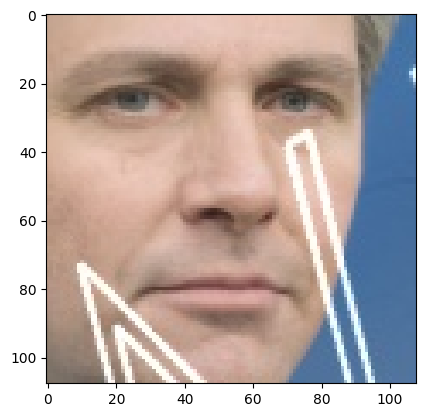

In [12]:
# Load the jpg file into a numpy array
image = face_recognition.load_image_file("./driving-licence/person01.jpg")

# Find all the faces in the image using the default HOG-based model.
# This method is fairly accurate, but not as accurate as the CNN model and not GPU accelerated.
# See also: find_faces_in_picture_cnn.py
face_locations = face_recognition.face_locations(image)

face_images = []

print("I found {} face(s) in this photograph.".format(len(face_locations)))

for face_location in face_locations:

    # Print the location of each face in this image
    top, right, bottom, left = face_location
    print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))

    # You can access the actual face itself like this:
    face_images.append(image[top:bottom, left:right])
    face_image = face_images[-1]

    # draw with matplotlib
    plt.imshow(face_image)
    plt.show()

I found 2 face(s) in this photograph.
The chin in this face has the following points: [(542, 277), (543, 283), (543, 289), (544, 295), (548, 300), (553, 304), (559, 307), (565, 309), (571, 309), (576, 308), (579, 305), (581, 301), (583, 296), (584, 292), (585, 287), (585, 283), (585, 278)]
The left_eyebrow in this face has the following points: [(553, 272), (557, 270), (561, 269), (565, 269), (569, 271)]
The right_eyebrow in this face has the following points: [(574, 271), (577, 270), (580, 270), (583, 270), (585, 272)]
The nose_bridge in this face has the following points: [(572, 274), (573, 278), (574, 281), (574, 284)]
The nose_tip in this face has the following points: [(568, 288), (571, 289), (573, 289), (575, 289), (576, 288)]
The left_eye in this face has the following points: [(557, 276), (560, 274), (562, 274), (565, 276), (562, 276), (559, 276)]
The right_eye in this face has the following points: [(575, 276), (577, 274), (580, 274), (581, 276), (580, 276), (577, 276)]
The to

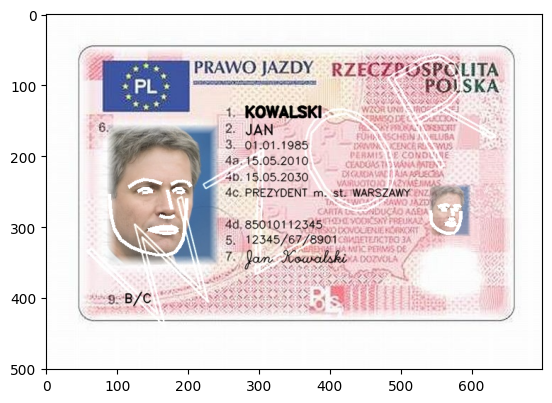

In [13]:
# import Pillow

image = face_recognition.load_image_file("./driving-licence/person01.jpg")

# Find all facial features in all the faces in the image
face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

# Create a PIL imagedraw object so we can draw on the picture
pil_image = Image.fromarray(image)
d = ImageDraw.Draw(pil_image)

for face_landmarks in face_landmarks_list:

    # Print the location of each facial feature in this image
    for facial_feature in face_landmarks.keys():
        print("The {} in this face has the following points: {}".format(facial_feature, face_landmarks[facial_feature]))

    # Let's trace out each facial feature in the image with a line!
    for facial_feature in face_landmarks.keys():
        d.line(face_landmarks[facial_feature], width=5)

plt.imshow(pil_image)

In [14]:

# Often instead of just checking if two faces match or not (True or False), it's helpful to see how similar they are.
# You can do that by using the face_distance function.

# The model was trained in a way that faces with a distance of 0.6 or less should be a match. But if you want to
# be more strict, you can look for a smaller face distance. For example, using a 0.55 cutoff would reduce false
# positive matches at the risk of more false negatives.

# Note: This isn't exactly the same as a "percent match". The scale isn't linear. But you can assume that images with a
# smaller distance are more similar to each other than ones with a larger distance.

# Load some images to compare against
known_obama_image = face_recognition.load_image_file("./faces/person01-1.png")
known_biden_image = face_recognition.load_image_file("./faces/person01-2.png")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]
biden_face_encoding = face_recognition.face_encodings(known_biden_image)[0]

known_encodings = [
    obama_face_encoding,
    biden_face_encoding
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("./faces/person01-3.png")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.43 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True

The test image has a distance of 0.32 from known image #1
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True



In [15]:
face_recognition.face_encodings(known_obama_image)

[array([-0.11961605,  0.15888704, -0.00261974, -0.01317541, -0.13885692,
         0.0523943 ,  0.00731486, -0.08906257,  0.21294133, -0.00877557,
         0.17351612, -0.01088269, -0.30973029, -0.05425816, -0.01642922,
         0.07571989, -0.19544329, -0.15977126, -0.13171116, -0.04033145,
         0.00229702,  0.04882074, -0.02799539, -0.01133762, -0.18230265,
        -0.40714759, -0.08681411, -0.10546798,  0.06829547, -0.0675957 ,
         0.03571479,  0.07696494, -0.18137369, -0.07775762,  0.03397033,
         0.12339123, -0.11403368,  0.01102112,  0.24303222,  0.01753887,
        -0.21820131, -0.01951841,  0.03389441,  0.30896467,  0.177536  ,
         0.11425743,  0.02686076, -0.1186469 ,  0.1096547 , -0.29779232,
         0.17513454,  0.25003663,  0.12364232,  0.13274603,  0.09337848,
        -0.2253855 ,  0.0194623 ,  0.15692279, -0.20465346,  0.03948652,
         0.13131346, -0.14234549, -0.00417581, -0.04866942,  0.25215787,
         0.06414826, -0.1101743 , -0.0689843 ,  0.2

In [16]:
# Ignatella: we can also predict names using classifier on the output of face_encodings

# https://github.com/ageitgey/face_recognition/blob/master/examples/face_recognition_svm.py

In [17]:
# Test of Piotrek doubts regarding person 5 similarity
known_obama_image = face_recognition.load_image_file("./faces/person05-1.png")

# Get the face encodings for the known images
obama_face_encoding = face_recognition.face_encodings(known_obama_image)[0]

known_encodings = [
    obama_face_encoding,
]

# Load a test image and get encondings for it
image_to_test = face_recognition.load_image_file("./faces/person05-2.png")
image_to_test_encoding = face_recognition.face_encodings(image_to_test)[0]

# See how far apart the test image is from the known faces
face_distances = face_recognition.face_distance(known_encodings, image_to_test_encoding)

for i, face_distance in enumerate(face_distances):
    print("The test image has a distance of {:.2} from known image #{}".format(face_distance, i))
    print("- With a normal cutoff of 0.6, would the test image match the known image? {}".format(face_distance < 0.6))
    print("- With a very strict cutoff of 0.5, would the test image match the known image? {}".format(face_distance < 0.5))
    print()

The test image has a distance of 0.41 from known image #0
- With a normal cutoff of 0.6, would the test image match the known image? True
- With a very strict cutoff of 0.5, would the test image match the known image? True



In [18]:
# lendmark detection

# Load the jpg file into a numpy array

image = face_recognition.load_image_file("./faces/person01-1.png")

# Find all facial features in all the faces in the image

face_landmarks_list = face_recognition.face_landmarks(image)

print("I found {} face(s) in this photograph.".format(len(face_landmarks_list)))

face_landmarks_list


I found 1 face(s) in this photograph.


[{'chin': [(65, 252),
   (66, 293),
   (69, 334),
   (78, 374),
   (100, 409),
   (135, 436),
   (177, 455),
   (219, 469),
   (260, 473),
   (293, 467),
   (313, 444),
   (330, 416),
   (341, 384),
   (349, 351),
   (355, 319),
   (358, 287),
   (355, 254)],
  'left_eyebrow': [(135, 223), (161, 207), (192, 200), (223, 204), (253, 216)],
  'right_eyebrow': [(283, 220),
   (303, 209),
   (326, 204),
   (346, 209),
   (357, 225)],
  'nose_bridge': [(271, 237), (275, 260), (280, 283), (285, 307)],
  'nose_tip': [(242, 329), (257, 335), (273, 339), (286, 335), (296, 329)],
  'left_eye': [(167, 243),
   (184, 233),
   (203, 232),
   (219, 244),
   (202, 247),
   (183, 248)],
  'right_eye': [(290, 244),
   (306, 233),
   (323, 234),
   (334, 245),
   (322, 249),
   (305, 248)],
  'top_lip': [(204, 382),
   (232, 374),
   (256, 368),
   (270, 372),
   (283, 368),
   (297, 375),
   (310, 385),
   (304, 383),
   (282, 380),
   (270, 381),
   (255, 379),
   (214, 382)],
  'bottom_lip': [(310, 38

### Now lets try to find 2 images on the driving licence, then compare them

I found 2 face(s) in this photograph.
face locations [(257, 596, 308, 544), (223, 223, 331, 115)]
A face is located at pixel location Top: 257, Left: 544, Bottom: 308, Right: 596


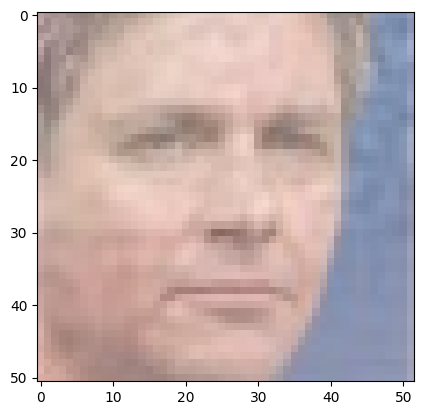

A face is located at pixel location Top: 223, Left: 115, Bottom: 331, Right: 223


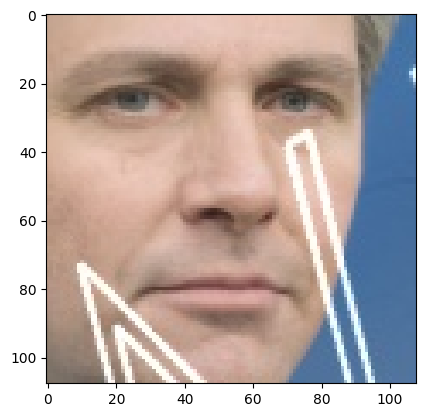

number of face encodings:  2
face distances:  [0.52516416]
The test image has a distance of [0.52516416] from known image
- With a normal cutoff of 0.6, would the test image match the known image? [ True]
- With a very strict cutoff of 0.5, would the test image match the known image? [False]


In [19]:
# now lets try to find 2 images on the driving licence, then compare them

# Load some images to compare against

driving_licence = face_recognition.load_image_file("./driving-licence/person01.jpg")

# Get the face locations for the known images

face_locations = face_recognition.face_locations(driving_licence)

# print face locations

print(f"I found {len(face_locations)} face(s) in this photograph.")
print('face locations', face_locations)

# draw with matplotlib faces

for face_location in face_locations:
    
        # Print the location of each face in this image
        top, right, bottom, left = face_location
        print("A face is located at pixel location Top: {}, Left: {}, Bottom: {}, Right: {}".format(top, left, bottom, right))
    
        # You can access the actual face itself like this:
        face_image = driving_licence[top:bottom, left:right]

        # draw with matplotlib
        plt.imshow(face_image)
        plt.show()



# Get the face encodings for the known images

face_encodings = face_recognition.face_encodings(driving_licence)

print('number of face encodings: ', len(face_encodings))

# Compare the faces

face_distance = face_recognition.face_distance([face_encodings[0]], face_encodings[1])

print('face distances: ', face_distance)

print(f"The test image has a distance of {face_distance} from known image")
print(f"- With a normal cutoff of 0.6, would the test image match the known image? {face_distance < 0.6}")
print(f"- With a very strict cutoff of 0.5, would the test image match the known image? {face_distance < 0.5}")


In [20]:
# now lets compare face from the licence with the face from the photo

# Load some images to compare against

face2 = face_recognition.load_image_file("./faces/person01-2.png")
face3 = face_recognition.load_image_file("./faces/person01-2.png")

# Get the face encodings for the known images

face2_encoding = face_recognition.face_encodings(face2)[0]
face3_encoding = face_recognition.face_encodings(face3)[0]

known_encodings = [face_encodings[0]]


face_distance = face_recognition.face_distance(known_encodings, face2_encoding)

print('face distances: ', face_distance)

print(f"The test image has a distance of {face_distance} from known image face2_encoding")
print(f"- With a normal cutoff of 0.6, would the test image match the known image? {face_distance < 0.6}")
print(f"- With a very strict cutoff of 0.5, would the test image match the known image? {face_distance < 0.5}")

face_distance = face_recognition.face_distance(known_encodings, face3_encoding)

print('face distances: ', face_distance)

print(f"The test image has a distance of {face_distance} from known image face3_encoding")
print(f"- With a normal cutoff of 0.6, would the test image match the known image? {face_distance < 0.6}")
print(f"- With a very strict cutoff of 0.5, would the test image match the known image? {face_distance < 0.5}")


face distances:  [0.53458931]
The test image has a distance of [0.53458931] from known image face2_encoding
- With a normal cutoff of 0.6, would the test image match the known image? [ True]
- With a very strict cutoff of 0.5, would the test image match the known image? [False]
face distances:  [0.53458931]
The test image has a distance of [0.53458931] from known image face3_encoding
- With a normal cutoff of 0.6, would the test image match the known image? [ True]
- With a very strict cutoff of 0.5, would the test image match the known image? [False]
